In [2]:
#Imports in this cell
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from keras.optimizers import SGD

First cells are dedicated to getting the data and processing it.

In [3]:
dataset = tfds.load('oxford_flowers102', as_supervised=True)
training_set = dataset['train']
validation_set= dataset['validation']
test_set = dataset['test']
# The first line here also downloads the dataset so it doesn't need to be downloaded every time.
# The following lines place the data into the predefined sets for the data.

In [4]:
image_size = 224

def custom_format_function(img, lbl):
    img = tf.image.resize(img, (image_size, image_size))
    img = tf.cast(img, tf.float32)
    img /= 255
    return img, lbl
# Converts all the images to a normal format which is image_size * image_size pixels
# Note about img /= 255. It doesn't convert the image to greyscale as first thought.
# It converts the values to be the RGB value within 1 (where 0 is 0 in RGB and 1 is 255 in RGB).
# Because of this we use the tf.cast to convert the values from a Integer to a Float
# This line significantly reduces the Loss (only tested using early epochs though) and increases the Accuracy

formatted_training_set = training_set.shuffle(612).map(custom_format_function).batch(1).prefetch(1)
formatted_validation_set = validation_set.map(custom_format_function).batch(1).prefetch(1)
formatted_testing_set = test_set.map(custom_format_function).batch(1).prefetch(1)
#these lines format the images and uses a batch call to make the dataset work in model.fit (doesn't work otherwise)


Below is a test for the image after the format_image is applied to work out what format_image does completely.


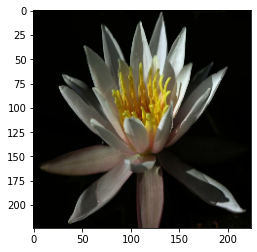

In [5]:
train_images_list = []

image_ds = training_set.map(custom_format_function).take(1)
for image, label in image_ds:  # example is (image, label)
  train_images_list.append(image)
train_images = np.array(train_images_list)

plt.figure()
plt.imshow(train_images[0])
plt.show()

Here is the neural network part.


In [6]:
#Changed the optimizer from adam to SGD, changing the batch size to 1 and increasing epochs now results is an accuracy of ~0.3 after 15 epochs
SGD_optimizer = SGD(lr=0.00005) #lr is learning rate, smaller better
Adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(image_size, image_size, 3)), #Important values
        tf.keras.layers.Dense(336, activation='sigmoid'),
        tf.keras.layers.Dense(224, activation='relu'),
        tf.keras.layers.Dense(102, activation = 'softmax'),
]) #Contains the actual neural network. The Flatten layer is important as it aids in converting the image to the neural network form.
#Dense with activation relu performs that neural layer. 

model.compile(optimizer=SGD_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#defines optimizer and loss functions for the model.
# If from_logits is False, Loss increases from ~4.6 to ~13


history = model.fit(formatted_training_set, epochs=180) #This does the heavy lifting and is training I believe. Epochs are the iterations of the model for training and fine tuning the weights.


C:\Users\iomat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/180


C:\Users\iomat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1020/1020 [==============================] - 182s 178ms/step - loss: 4.6929 - accuracy: 0.0108
Epoch 2/180
1020/1020 [==============================] - 179s 176ms/step - loss: 4.6190 - accuracy: 0.0167
Epoch 3/180
1020/1020 [==============================] - 177s 173ms/step - loss: 4.5776 - accuracy: 0.0255
Epoch 4/180
1020/1020 [==============================] - 179s 175ms/step - loss: 4.5420 - accuracy: 0.0304
Epoch 5/180
1020/1020 [==============================] - 177s 173ms/step - loss: 4.5067 - accuracy: 0.0431
Epoch 6/180
1020/1020 [==============================] - 177s 173ms/step - loss: 4.4752 - accuracy: 0.0598
Epoch 7/180
1020/1020 [==============================] - 176s 172ms/step - loss: 4.4463 - accuracy: 0.0520
Epoch 8/180
1020/1020 [==============================] - 178s 174ms/step - loss: 4.4148 - accuracy: 0.0725
Epoch 9/180
1020/1020 [==============================] - 175s 172ms/step - loss: 4.3848 - accuracy: 0.0833
Epoch 10/180
1020/1020 [=========================

The following cell uses the trained model on the split of images that are testing images.

In [7]:
test_loss, test_acc = model.evaluate(formatted_testing_set, verbose=2)

print('\nTest accuracy:', test_acc) #uses the model on our testing images to see their performance against new images.

6149/6149 - 121s - loss: 3.7121 - accuracy: 0.1407 - 121s/epoch - 20ms/step

Test accuracy: 0.14067327976226807


The following two cells are for saving and loading the model.

Note that the loading cell should be called solely for using it on the testing cell above.

In [24]:
#Only call to load the model from latest save
model = keras.models.load_model('output_as_tf_170_epochs')

In [8]:
#Only call to save the model's values
model.save('output_as_tf_170_epochs', save_format='tf')

INFO:tensorflow:Assets written to: output_as_tf_170_epochs\assets


INFO:tensorflow:Assets written to: output_as_tf_170_epochs\assets
